In [1]:
import netCDF4
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cmocean as cm
import matplotlib.colors as mcolors
from xgcm import Grid
%matplotlib inline
from mpl_toolkits import mplot3d
import gsw
import pandas as pd
import colormaps as cmaps

In [2]:
from scipy.interpolate import RegularGridInterpolator

In [3]:
import h5py
f = h5py.File("_model_checkpoint_iteration412247.jld2", "r")

In [4]:
print("Keys in the JLD2 file:", list(f.keys()))

Keys in the JLD2 file: ['NonhydrostaticModel', '_types']


In [5]:
list(f["NonhydrostaticModel"].keys())

['S',
 'T',
 'checkpointed_properties',
 'clock',
 'grid',
 'timestepper',
 'u',
 'v',
 'w']

In [6]:
f["NonhydrostaticModel"]["checkpointed_properties"][:]

array([b'grid', b'clock', b'timestepper'], dtype=object)

In [7]:
clock = f["NonhydrostaticModel"]["clock"][()]
clock

(26700., 0.05872877, 0.01957626, 412247, 1)

In [8]:
grid = f["NonhydrostaticModel"]["grid"][()]
grid

(512, 512, 128, 5, 5, 5, 1., 1., 0.1, 0.00195312, 0.00195312, (((-0., -0.), (0.00195312, 0.), 523, 6), (-5,)), (((0.00097656, 0.), (0.00195312, 0.), 522, 6), (-5,)), 0.00195312, 0.00195312, (((-0., -0.), (0.00195312, 0.), 523, 6), (-5,)), (((0.00097656, 0.), (0.00195312, 0.), 522, 6), (-5,)), ((((0., 0.), (0.00078125, 4.4408921e-17), 139, 134), (-5,)), (((0.00039063, -2.16840434e-20), (0.00078125, 4.4408921e-17), 138, 134), (-5,)), 0.00078125, 0.00078125))

In [10]:
list(f["NonhydrostaticModel"]["timestepper"]['G⁻']["S"].keys())
list(f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["S"].keys())

['boundary_conditions', 'data', 'indices', 'location']

In [9]:
# my_list = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:].flatten() == f["NonhydrostaticModel"]["T"]["data"][:].flatten()
# filtered_list = [item for item in my_list if item]
# len(filtered_list)

In [10]:
list(f["NonhydrostaticModel"]["S"].keys())

['boundary_conditions', 'data', 'indices', 'location']

In [11]:
# boundary_conditions = 
f["NonhydrostaticModel"]["S"]["indices"][()]

Empty(dtype=dtype('V1'))

In [9]:
# S_data = f["NonhydrostaticModel"]["S"]["data"][:]
T_data = f["NonhydrostaticModel"]["T"]["data"][:]
# u_data = f["NonhydrostaticModel"]["u"]["data"][:]
# v_data = f["NonhydrostaticModel"]["v"]["data"][:]
# w_data = f["NonhydrostaticModel"]["w"]["data"][:]

In [10]:
T_data.shape[-1]

522

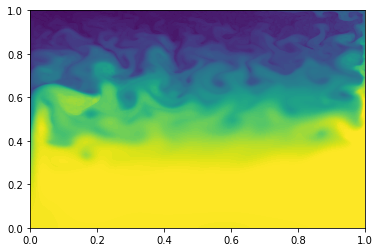

In [11]:
plt.contourf(np.linspace(0,1,T_data.shape[-1]-10), np.linspace(0,1,T_data.shape[-1]-10), T_data[-20, 5:-5, 5:-5], levels=np.linspace(10,20,101), extend='both')


In [12]:
# Gn_S_data = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["S"]["data"][:]
# Gn_T_data = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:]
# Gn_u_data = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["u"]["data"][:]
# Gn_v_data = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["v"]["data"][:]
# Gn_w_data = f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["w"]["data"][:]

In [13]:
# G__S_data = f["NonhydrostaticModel"]["timestepper"]['G⁻']["S"]["data"][:]
# G__T_data = f["NonhydrostaticModel"]["timestepper"]['G⁻']["T"]["data"][:]
# G__u_data = f["NonhydrostaticModel"]["timestepper"]['G⁻']["u"]["data"][:]
# G__v_data = f["NonhydrostaticModel"]["timestepper"]['G⁻']["v"]["data"][:]
# G__w_data = f["NonhydrostaticModel"]["timestepper"]['G⁻']["w"]["data"][:]

In [20]:
list(f["_types"].keys())

['00000001',
 '00000002',
 '00000003',
 '00000004',
 '00000005',
 '00000006',
 '00000007',
 '00000008',
 '00000009',
 '00000010',
 '00000011',
 '00000012',
 '00000013',
 '00000014',
 '00000015',
 '00000016',
 '00000017',
 '00000018',
 '00000019',
 '00000020',
 '00000021',
 '00000022',
 '00000023',
 '00000024',
 '00000025',
 '00000026',
 '00000027',
 '00000028',
 '00000029',
 '00000030']

In [4]:
# !pip3 install colormaps
# !pip3 install h5py

In [12]:
f2 = h5py.File("model_checkpoint_iteration412247.jld2", "a")
# f2 = h5py.File("model_checkpoint_iteration0.jld2", "a")

In [13]:
list(f2["NonhydrostaticModel"].keys())

['S',
 'T',
 'checkpointed_properties',
 'clock',
 'grid',
 'timestepper',
 'u',
 'v',
 'w']

In [14]:
f2["NonhydrostaticModel"]["checkpointed_properties"][:]

array([b'grid', b'clock', b'timestepper'], dtype=object)

In [15]:
f2["NonhydrostaticModel"]["clock"][()] = clock
f2["NonhydrostaticModel"]["clock"][()]

(26700., 0.05872877, 0.01957626, 412247, 1)

In [16]:
f2["NonhydrostaticModel"]["grid"][()]

(1024, 1024, 256, 5, 5, 5, 1., 1., 0.1, 0.00097656, 0.00097656, (((-0., -0.), (0.00097656, 0.), 1035, 6), (-5,)), (((0.00048828, 0.), (0.00097656, 0.), 1034, 6), (-5,)), 0.00097656, 0.00097656, (((-0., -0.), (0.00097656, 0.), 1035, 6), (-5,)), (((0.00048828, 0.), (0.00097656, 0.), 1034, 6), (-5,)), ((((0., 0.), (0.00039062, 2.22044605e-17), 267, 262), (-5,)), (((0.00019531, -1.08420217e-20), (0.00039062, 2.22044605e-17), 266, 262), (-5,)), 0.00039063, 0.00039063))

In [14]:
f2["NonhydrostaticModel"]["S"]["data"][:].shape

(266, 1034, 1034)

In [57]:
# x_fr = np.linspace(0, 1, 522)
# y_fr = np.linspace(0, 1, 522)
# z_fr = np.linspace(0, 1, 138)

In [58]:
# x_to = np.linspace(0, 1, 522)
# y_to = np.linspace(0, 1, 522)
# z_to = np.linspace(0, 1, 266)

In [79]:
# Z_fr, X_fr, Y_fr = np.meshgrid(z_fr, x_fr, y_fr, indexing='ij')

In [86]:
# Z_to, X_to, Y_to = np.meshgrid(z_to, x_to, y_to, indexing='ij')

In [87]:
# interp_func_T = RegularGridInterpolator((z_fr, x_fr, y_fr), T_data)

In [88]:
# query_points = np.array(list(zip(Z_to.ravel(), X_to.ravel(), Y_to.ravel())))

In [89]:
# data_new_flat = interp_func_T(query_points)

In [90]:
# interpolated_T = data_new_flat.reshape(X_to.shape)

In [91]:
# interpolated_T.shape

(266, 522, 522)

In [16]:
def interp_function_3D(old, new):
    o_dim_z, o_dim_x, o_dim_y = old.shape
    n_dim_z, n_dim_x, n_dim_y = new.shape
    
    interp_func = RegularGridInterpolator((np.linspace(0, 1, o_dim_z), 
                                           np.linspace(0, 1, o_dim_x), 
                                           np.linspace(0, 1, o_dim_y)), old)
    Z_to, X_to, Y_to = np.meshgrid(np.linspace(0, 1, n_dim_z), 
                                   np.linspace(0, 1, n_dim_x), 
                                   np.linspace(0, 1, n_dim_y), indexing='ij')
    query_points = np.array(list(zip(Z_to.ravel(), X_to.ravel(), Y_to.ravel())))
    data_new_flat = interp_func(query_points)
    return data_new_flat.reshape(X_to.shape)

In [17]:
f2["NonhydrostaticModel"]["T"]["data"][:][5:-5, 5:-5, 5:-5].shape

(256, 1024, 1024)

In [18]:
%%time
interpolated_T = interp_function_3D(f["NonhydrostaticModel"]["T"]["data"][:][5:-5, 5:-5, 5:-5], 
                                    f2["NonhydrostaticModel"]["T"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_T_tmp = f2["NonhydrostaticModel"]["T"]["data"][:].copy()
interpolated_T_tmp[5:-5, 5:-5, 5:-5] = interpolated_T

f2["NonhydrostaticModel"]["T"]["data"][:] = interpolated_T_tmp

CPU times: user 2min 34s, sys: 55.9 s, total: 3min 30s
Wall time: 3min 30s


In [19]:
%%time
interpolated_u = interp_function_3D(f["NonhydrostaticModel"]["u"]["data"][:][5:-5, 5:-5, 5:-5], 
                                    f2["NonhydrostaticModel"]["u"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_u_tmp = f2["NonhydrostaticModel"]["u"]["data"][:].copy()
interpolated_u_tmp[5:-5, 5:-5, 5:-5] = interpolated_u

f2["NonhydrostaticModel"]["u"]["data"][:] = interpolated_u_tmp

CPU times: user 2min 37s, sys: 1min 2s, total: 3min 39s
Wall time: 3min 39s


In [20]:
%%time
interpolated_v = interp_function_3D(f["NonhydrostaticModel"]["v"]["data"][:][5:-5, 5:-5, 5:-5], 
                                    f2["NonhydrostaticModel"]["v"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_v_tmp = f2["NonhydrostaticModel"]["v"]["data"][:].copy()
interpolated_v_tmp[5:-5, 5:-5, 5:-5] = interpolated_v

f2["NonhydrostaticModel"]["v"]["data"][:] = interpolated_v_tmp

CPU times: user 2min 36s, sys: 1min, total: 3min 36s
Wall time: 3min 36s


In [21]:
%%time
interpolated_w = interp_function_3D(f["NonhydrostaticModel"]["w"]["data"][:][5:-5, 5:-5, 5:-5], 
                                    f2["NonhydrostaticModel"]["w"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_w_tmp = f2["NonhydrostaticModel"]["w"]["data"][:].copy()
interpolated_w_tmp[5:-5, 5:-5, 5:-5] = interpolated_w

f2["NonhydrostaticModel"]["w"]["data"][:] = interpolated_w_tmp

CPU times: user 2min 38s, sys: 1min 2s, total: 3min 41s
Wall time: 3min 42s


In [22]:
%%time
interpolated_T = interp_function_3D(f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_T_tmp = f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:].copy()
interpolated_T_tmp[5:-5, 5:-5, 5:-5] = interpolated_T

f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["T"]["data"][:] = interpolated_T_tmp

CPU times: user 2min 38s, sys: 1min 2s, total: 3min 41s
Wall time: 3min 41s


In [23]:
%%time
interpolated_u = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["u"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["u"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_u_tmp = f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["u"]["data"][:].copy()
interpolated_u_tmp[5:-5, 5:-5, 5:-5] = interpolated_u

f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["u"]["data"][:] = interpolated_u_tmp

CPU times: user 2min 38s, sys: 1min 1s, total: 3min 39s
Wall time: 3min 41s


In [24]:
%%time
interpolated_v = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["v"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["v"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_v_tmp = f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["v"]["data"][:].copy()
interpolated_v_tmp[5:-5, 5:-5, 5:-5] = interpolated_v

f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["v"]["data"][:] = interpolated_v_tmp

CPU times: user 2min 37s, sys: 1min 2s, total: 3min 40s
Wall time: 3min 41s


In [25]:
%%time
interpolated_w = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['Gⁿ']["w"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["w"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_w_tmp = f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["w"]["data"][:].copy()
interpolated_w_tmp[5:-5, 5:-5, 5:-5] = interpolated_w

f2["NonhydrostaticModel"]["timestepper"]['Gⁿ']["w"]["data"][:] = interpolated_w_tmp

CPU times: user 2min 38s, sys: 1min 2s, total: 3min 41s
Wall time: 3min 42s


In [26]:
%%time
interpolated_T = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['G⁻']["T"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['G⁻']["T"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_T_tmp = f2["NonhydrostaticModel"]["timestepper"]['G⁻']["T"]["data"][:].copy()
interpolated_T_tmp[5:-5, 5:-5, 5:-5] = interpolated_T

f2["NonhydrostaticModel"]["timestepper"]['G⁻']["T"]["data"][:] = interpolated_T_tmp

CPU times: user 2min 38s, sys: 1min 2s, total: 3min 41s
Wall time: 3min 41s


In [27]:
%%time
interpolated_u = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['G⁻']["u"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['G⁻']["u"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_u_tmp = f2["NonhydrostaticModel"]["timestepper"]['G⁻']["u"]["data"][:].copy()
interpolated_u_tmp[5:-5, 5:-5, 5:-5] = interpolated_u

f2["NonhydrostaticModel"]["timestepper"]['G⁻']["u"]["data"][:] = interpolated_u_tmp

CPU times: user 2min 37s, sys: 1min 1s, total: 3min 39s
Wall time: 3min 41s


In [28]:
%%time
interpolated_v = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['G⁻']["v"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['G⁻']["v"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_v_tmp = f2["NonhydrostaticModel"]["timestepper"]['G⁻']["v"]["data"][:].copy()
interpolated_v_tmp[5:-5, 5:-5, 5:-5] = interpolated_v

f2["NonhydrostaticModel"]["timestepper"]['G⁻']["v"]["data"][:] = interpolated_v_tmp

CPU times: user 2min 37s, sys: 1min 1s, total: 3min 38s
Wall time: 3min 39s


In [29]:
%%time
interpolated_w = interp_function_3D( f["NonhydrostaticModel"]["timestepper"]['G⁻']["w"]["data"][:][5:-5, 5:-5, 5:-5],
                                    f2["NonhydrostaticModel"]["timestepper"]['G⁻']["w"]["data"][:][5:-5, 5:-5, 5:-5])

interpolated_w_tmp = f2["NonhydrostaticModel"]["timestepper"]['G⁻']["w"]["data"][:].copy()
interpolated_w_tmp[5:-5, 5:-5, 5:-5] = interpolated_w

f2["NonhydrostaticModel"]["timestepper"]['G⁻']["w"]["data"][:] = interpolated_w_tmp

CPU times: user 2min 37s, sys: 1min 1s, total: 3min 39s
Wall time: 3min 40s


In [1]:
f2["NonhydrostaticModel"]["T"]["data"][:].shape

NameError: name 'f2' is not defined

In [25]:
T_data = f2["NonhydrostaticModel"]["T"]["data"][:]
T_data.shape

(138, 1034, 1034)

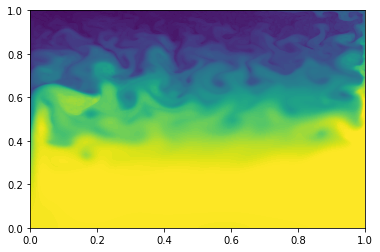

In [26]:
plt.contourf(np.linspace(0,1,1024), np.linspace(0,1,1024), T_data[-20, 5:-5, 5:-5], levels=np.linspace(10,20,101), extend='both')